# How does the job satisfaction of Software Developers differ by Geographic Region

**Source**: 2021 FreeCodeCamp New Developer Survey - https://github.com/freeCodeCamp/2021-new-coder-survey

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(15,11)})

In [3]:
survey_columns = [
    '10. Are you already employed in a software development job?',
    '16. About how much money do you expect to earn per year at your first developer job (in US Dollars)? ',
    '20. Regarding employment status, are you currently.... ',
    '21. If you are currently working, which field do you work in?',
    '22. About how much money did you earn last year from any job or employment (in US Dollars)? ',
    '23. How old are you?',
    '24. Which of the following best represents how you think of yourself?',
    '25. With which of these groups do you primarily identify?',
    '26. Which part of the world do you live in?',
    '28. About how many people live in your city?',
    '38. Do you think you have enough savings to survive for 3 months with no income?',
    '40. How long have you been working in your current job?',
    '44. Do you consider yourself under-employed? (Under-employment means working a job that is below your education level.)',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Earnings]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Work-life balance]'
]
survey = pd.read_csv('2021 New Coder Survey.csv', usecols=survey_columns)

In [4]:
rename_mapping = {
    '10. Are you already employed in a software development job?': 'software_employed',
    '16. About how much money do you expect to earn per year at your first developer job (in US Dollars)? ': 'expected_earnings',
    '20. Regarding employment status, are you currently.... ': 'employment_status',
    '21. If you are currently working, which field do you work in?': 'current_field',
    '22. About how much money did you earn last year from any job or employment (in US Dollars)? ': 'previous_earnings',
    '23. How old are you?': 'age',
    '24. Which of the following best represents how you think of yourself?': 'gender',
    '25. With which of these groups do you primarily identify?': 'ethnic_group',
    '26. Which part of the world do you live in?': 'geographic_region',
    '28. About how many people live in your city?': 'city_population',
    '38. Do you think you have enough savings to survive for 3 months with no income?': 'three_months_savings',
    '40. How long have you been working in your current job?': 'length_current_job',
    '44. Do you consider yourself under-employed? (Under-employment means working a job that is below your education level.)': 'under_employed',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Earnings]': 'earnings_satisfaction',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Work-life balance]': 'work_life_satisfaction'
}
survey.rename(columns=rename_mapping, inplace=True)

In [5]:
survey.head()

,software_employed,expected_earnings,employment_status,current_field,previous_earnings,age,gender,ethnic_group,geographic_region,city_population,three_months_savings,length_current_job,under_employed,earnings_satisfaction,work_life_satisfaction
0,Yes,NaN,Full-time employed for wages,Software development and IT,NaN,33.0,Prefer not to say,Alien,Europe and Central Asia,"Between 100,000 and 1 million",Maybe,1 to 3 years,No,Somewhat satisfied,Somewhat dissatisfied
1,No,"$10,000 to $20,999",Full-time employed for wages,Oilfield,"Under $1,000",38.0,Male,Hispanic/Latino(a/x),Latin America and Caribbean,"Less than 100,000",No,more than 3 years,No,Very dissatisfied,Somewhat satisfied
2,No,"$75,000 to $99,999",unemployed,I am not currently working,NaN,NaN,Male,NaN,North America,More than 1 million,Yes,I am not currently working,Not applicable,Not Applicable,Not Applicable
3,No,NaN,Not working but looking for work,I am not currently working,NaN,19.0,Male,Black/African American,Sub-Saharan Africa,"Between 100,000 and 1 million",No,I am not currently working,Not applicable,NaN,NaN
4,Yes,"$30,000 to $49,999",Full-time employed for wages,Finance,"$40,000 to $49,999",35.0,Male,East Asian,East Asia and Pacific,More than 1 million,Maybe,more than 3 years,No,Somewhat satisfied,Somewhat satisfied


In [6]:
software_workers = survey[(survey['software_employed'] == 'Yes')]

## Earnings of Software Developers by Geographic Region

In [40]:
geographical_earnings = software_workers[['previous_earnings','geographic_region']]
#remove earnings values that are unhelpful
remove_vals = [
    'I don\'t want to answer',
    'None',
    'I don’t know' 
]
geographical_earnings = geographical_earnings[~geographical_earnings['previous_earnings'].isin(remove_vals)]

In [107]:
#the ranges are too narrow, so the bar chart is less meaningful. Let's widen the ranges
def assignRange(x):
    ranges={
        '20,000 and under': [
            '$1,000 to $2,999', 
            '$10,000 to $14,999',
            '$3,000 to $4,999',
            '$5,000 to $6,999',
            '$7,000 to $9,999',
            '$15,000 to $19,999',
            'Under $1,000'
       ],
        '20,000 to 50,000': [
            '$20,000 to $24,999',
            '$25,000 to $29,999',
            '$30,000 to $34,999',
            '$35,000 to $39,999',
            '$40,000 to $49,999',
        ],
        '50,000 to 90,000': [
            '$50,000 to $59,999',
            '$60,000 to $74,999',
            '$75,000 to $89,999'
        ],
        '90,000 to 160,000': [
            '$90,000 to $119,999',
            '$60,000 to $74,999',
            '$75,000 to $89,999',
            '$120,000 to $159,999'
        ],
        '160,000 and above': [
             '$160,000 to $199,999', 
             '$200,000 to $249,999',
             '$250,000 or over'
        ]
    }
    for r in ranges:
        if x in ranges[r]:
            return r
geographical_earnings['earnings'] = geographical_earnings['previous_earnings'].apply(assignRange)

In [108]:
geographical_earnings

,previous_earnings,geographic_region,earnings
0,NaN,Europe and Central Asia,None
4,"$40,000 to $49,999",East Asia and Pacific,"20,000 to 50,000"
5,"$75,000 to $89,999",North America,"50,000 to 90,000"
6,"$60,000 to $74,999",North America,"50,000 to 90,000"
7,"$1,000 to $2,999",Europe and Central Asia,"20,000 and under"
...,...,...,...
18094,"$10,000 to $14,999",Europe and Central Asia,"20,000 and under"
18109,"$90,000 to $119,999",North America,"90,000 to 160,000"
18111,"$1,000 to $2,999",Southeast Asia,"20,000 and under"
18114,"$25,000 to $29,999",East Asia and Pacific,"20,000 to 50,000"


In [109]:
#pivot the dataframe on the earnings column
earnings_piv = pd.pivot_table(geographical_earnings, index='geographic_region', values='earnings', columns='earnings', aggfunc=lambda x: len(x))
earnings_piv

earnings,"160,000 and above","20,000 and under","20,000 to 50,000","50,000 to 90,000","90,000 to 160,000"
geographic_region,,,,,
East Asia and Pacific,1.0,16.0,14.0,9.0,4.0
Europe and Central Asia,NaN,168.0,145.0,58.0,12.0
Latin America and Caribbean,1.0,179.0,27.0,8.0,2.0
Middle East and North Africa,NaN,42.0,6.0,9.0,2.0
North America,9.0,47.0,59.0,107.0,72.0
South Asia,2.0,174.0,31.0,6.0,NaN
Southeast Asia,1.0,87.0,11.0,NaN,NaN
Sub-Saharan Africa,NaN,54.0,8.0,NaN,2.0


Text(0.5, 1.0, 'Software Developer Salary Ranges by Geographic Region (USD)')

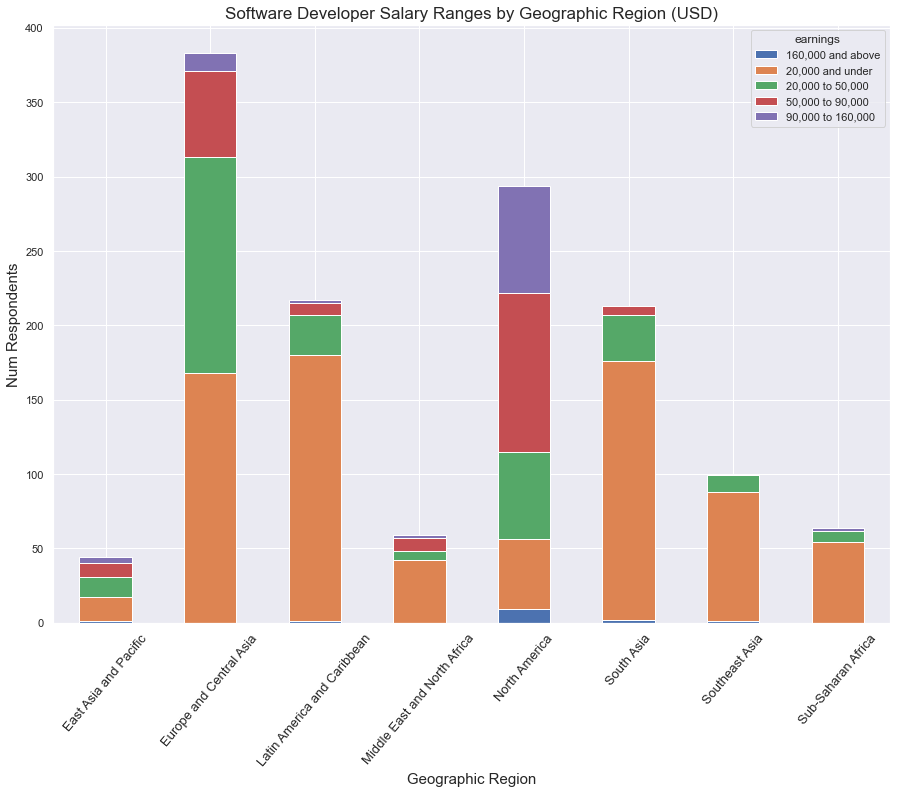

In [111]:
earnings_piv.plot(kind='bar', stacked=True)
plt.xlabel('Geographic Region', fontsize=15)
plt.ylabel('Num Respondents', fontsize=15)
plt.xticks(rotation=50, fontsize=13)
plt.title('Software Developer Salary Ranges by Geographic Region (USD)', fontsize=17)

## In which region are software developers most financially secure?

As a proxy for financial security, we'll be using the measure of having 3 months of living expenses saved

In [48]:
geographical_savings = software_workers[['three_months_savings','geographic_region']]

In [95]:
geographical_savings.describe()

,three_months_savings,geographic_region
count,1701,1717
unique,3,8
top,Yes,Europe and Central Asia
freq,797,491


In [97]:
y = geographical_savings['geographic_region'].dropna().unique()
x = []

In [98]:
for region in y:
    region_df = geographical_savings[(geographical_savings['geographic_region'] == region)]
    count_secure = region_df[(region_df.three_months_savings == 'Yes')]['three_months_savings'].count()
    print (region, count_secure)
    percentage_secure = count_secure / region_df['three_months_savings'].count() * 100
    x.append(percentage_secure)

Europe and Central Asia 285
East Asia and Pacific 35
North America 188
South Asia 104
Southeast Asia 50
Latin America and Caribbean 78
Middle East and North Africa 31
Sub-Saharan Africa 22


Text(-1, -23, '*Having 3 months worth of savings is used as a proxy for financial security')

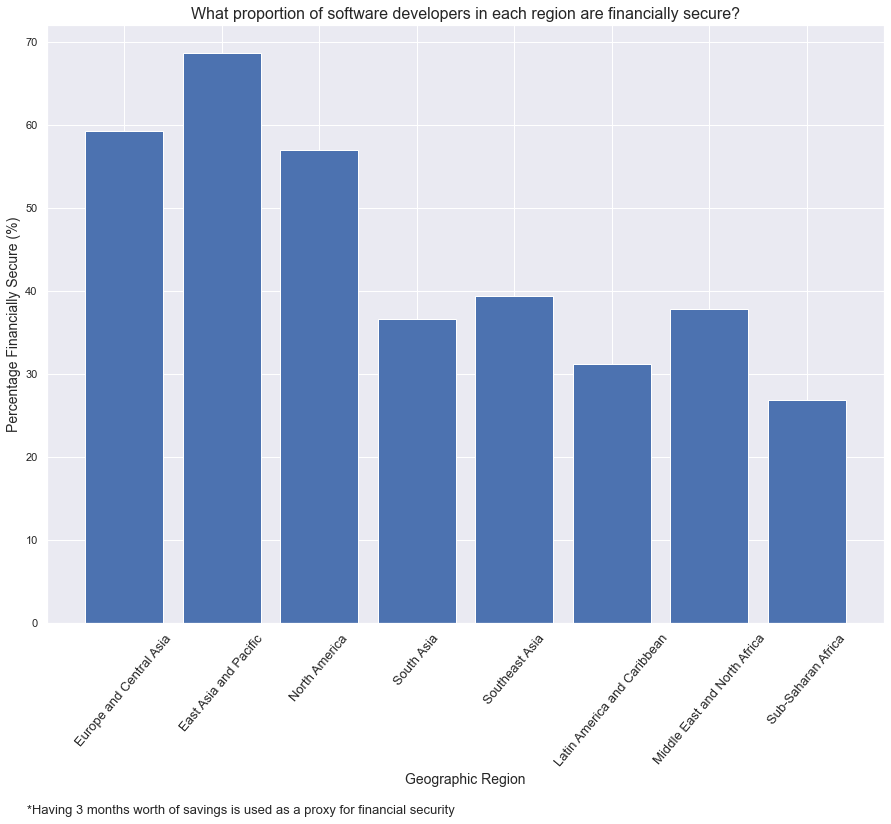

In [116]:
plt.bar(y, x)
plt.xticks(rotation=50, fontsize=13)
plt.ylabel('Percentage Financially Secure (%)', fontsize=14)
plt.xlabel('Geographic Region', fontsize=14)
plt.title('What proportion of software developers in each region are financially secure?', fontsize=16)
plt.text(-1,-23,'*Having 3 months worth of savings is used as a proxy for financial security', fontsize=13)